In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("D:\MCA-4th semester\data science dataset\owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
data.shape

(101999, 60)

In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101999 entries, 0 to 101998
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               101999 non-null  object 
 1   continent                              97231 non-null   object 
 2   location                               101999 non-null  object 
 3   date                                   101999 non-null  object 
 4   total_cases                            98192 non-null   float64
 5   new_cases                              98189 non-null   float64
 6   new_cases_smoothed                     97179 non-null   float64
 7   total_deaths                           87983 non-null   float64
 8   new_deaths                             88139 non-null   float64
 9   new_deaths_smoothed                    97179 non-null   float64
 10  total_cases_per_million                97670 non-null   

In [6]:
data['location'].value_counts()

Argentina                          559
Mexico                             559
Thailand                           556
Peru                               554
Taiwan                             544
                                  ... 
Cook Islands                        36
Niue                                16
Pitcairn                             7
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 231, dtype: int64

In [8]:
#description of categorical columns
data.describe(include='O')   

,iso_code,continent,location,date,tests_units
count,101999,97231,101999,101999,54975
unique,231,6,231,560,4
top,ARG,Africa,Argentina,2021-05-27,tests performed
freq,559,26223,559,225,34274


In [9]:
data.isna().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [10]:
data.isna().sum()

iso_code                                      0
continent                                  4768
location                                      0
date                                          0
total_cases                                3807
new_cases                                  3810
new_cases_smoothed                         4820
total_deaths                              14016
new_deaths                                13860
new_deaths_smoothed                        4820
total_cases_per_million                    4329
new_cases_per_million                      4332
new_cases_smoothed_per_million             5337
total_deaths_per_million                  14525
new_deaths_per_million                    14369
new_deaths_smoothed_per_million            5337
reproduction_rate                         19772
icu_patients                              91740
icu_patients_per_million                  91740
hosp_patients                             89261
hosp_patients_per_million               

In [14]:
india_case = data[data['location']=="India"]

In [15]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42181,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42182,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42183,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42184,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42185,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


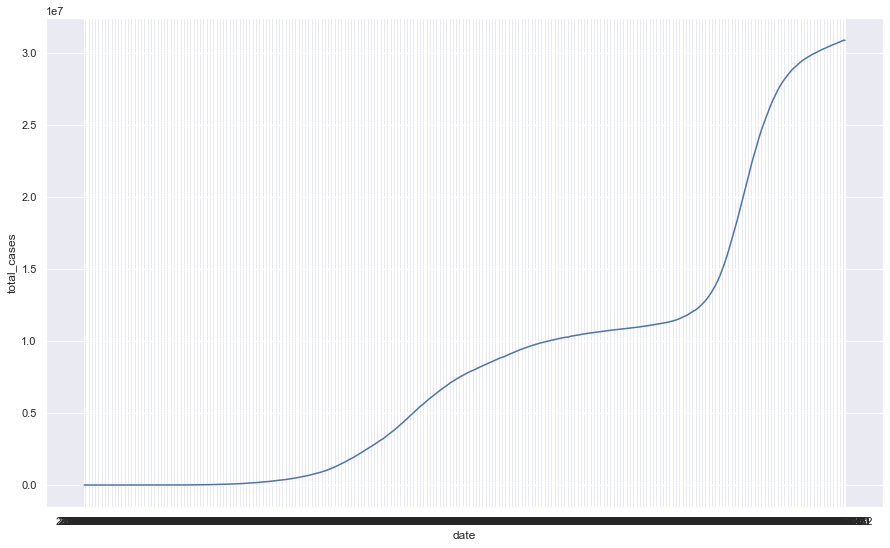

In [17]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,9)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

In [19]:
#making a dataframe for last 5 days
india_last_5_days=india_case.tail()

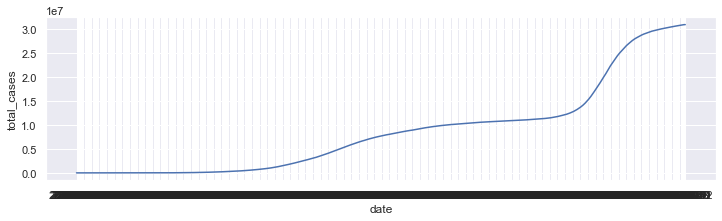

In [23]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(12,3)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

In [25]:
#Brazil case
brazil_case = data[data['location']=='Brazil']
brazil_case.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12969,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12970,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12971,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12972,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12973,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [26]:
#making a dataframe cases for last 5 days in brazil
brazil_last_5_days = brazil_case.tail()

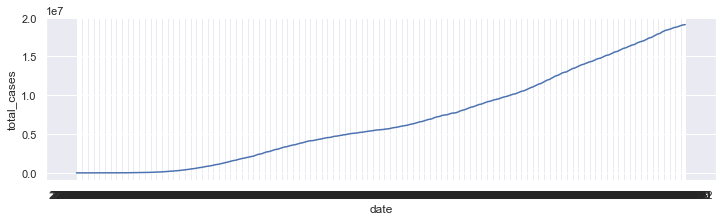

In [27]:
sns.set(rc={'figure.figsize':(12,3)})
sns.lineplot(x="date",y="total_cases",data=brazil_case)
plt.show()

In [38]:
#understanding the cases india,china,japan
india_china_japan=data[(data['location']=='India') | (data['location']=='China') |(data['location'] == 'Japan')]

In [39]:
india_china_japan.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
47480,JPN,Asia,Japan,2021-07-08,814319.0,2230.0,1754.429,14865.0,17.0,15.857,...,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN
47481,JPN,Asia,Japan,2021-07-09,816593.0,2274.0,1825.857,14885.0,20.0,15.143,...,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN
47482,JPN,Asia,Japan,2021-07-10,819051.0,2458.0,1907.857,14896.0,11.0,15.429,...,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN
47483,JPN,Asia,Japan,2021-07-11,821083.0,2032.0,1986.143,14902.0,6.0,15.571,...,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN
47484,JPN,Asia,Japan,2021-07-12,822594.0,1511.0,2053.429,14905.0,3.0,13.286,...,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,NaN


In [40]:
india_china_japan.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
19176,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19177,CHN,Asia,China,2020-01-23,641.0,93.0,NaN,18.0,1.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19178,CHN,Asia,China,2020-01-24,918.0,277.0,NaN,26.0,8.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19179,CHN,Asia,China,2020-01-25,1401.0,483.0,NaN,42.0,16.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19180,CHN,Asia,China,2020-01-26,2067.0,666.0,NaN,56.0,14.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN


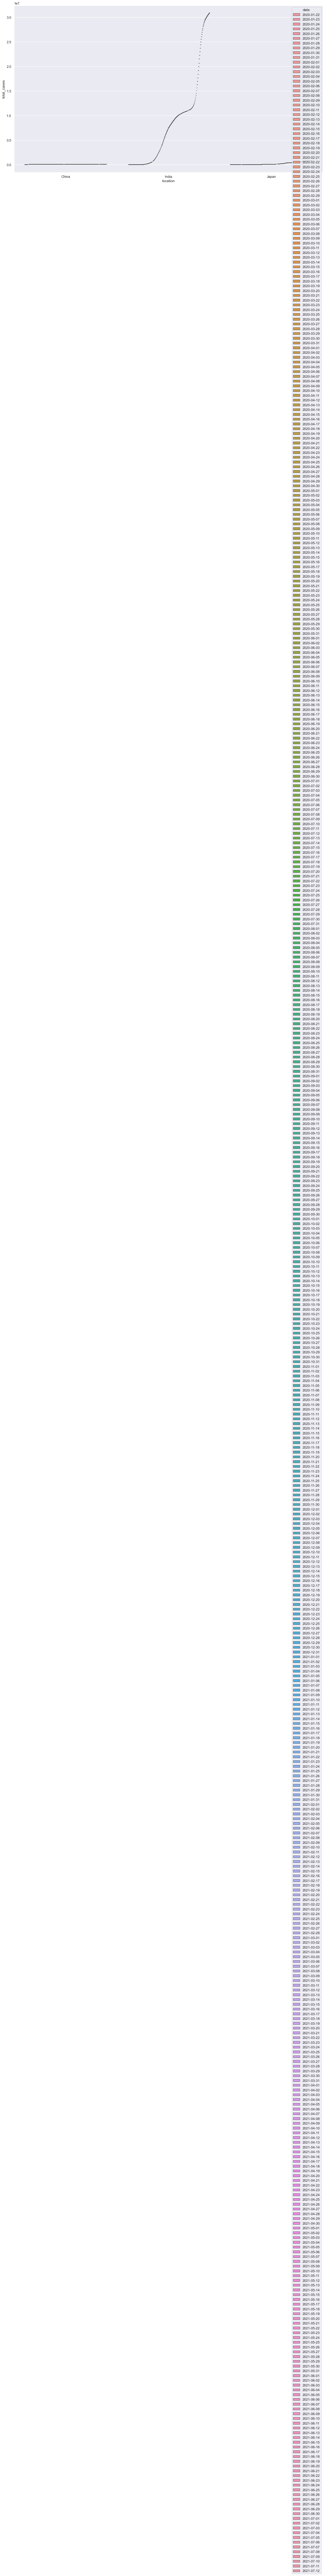

In [47]:
#plotting growth of cases across india,china ,japan
sns.set(rc={'figure.figsize':(18,10)})
sns.boxplot(x="location",y="total_cases",data=india_china_japan,hue="date")
plt.show()

In [48]:
#Getting latest covid data
last_day_cases=data[data['date']=="2020-05-20"]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
86,AFG,Asia,Afghanistan,2020-05-20,8146.0,492.0,417.000,188.0,10.0,8.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
602,OWID_AFR,NaN,Africa,2020-05-20,95062.0,3792.0,3262.143,2990.0,83.0,71.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,ALB,Europe,Albania,2020-05-20,964.0,15.0,12.000,31.0,0.0,0.000,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
1610,DZA,Africa,Algeria,2020-05-20,7542.0,165.0,184.143,568.0,7.0,6.571,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2108,AND,Europe,Andorra,2020-05-20,762.0,1.0,0.286,51.0,0.0,0.286,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99515,VNM,Asia,Vietnam,2020-05-20,324.0,0.0,5.143,NaN,NaN,0.000,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN
100159,OWID_WRL,NaN,World,2020-05-20,5009628.0,101906.0,93175.571,343328.0,5194.0,4832.286,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
100618,YEM,Asia,Yemen,2020-05-20,180.0,13.0,15.714,29.0,1.0,2.429,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
101100,ZMB,Africa,Zambia,2020-05-20,832.0,60.0,55.143,7.0,0.0,0.000,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [49]:
#sorting data w.r.t total_cases
max_cases_country = last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
100159,OWID_WRL,NaN,World,2020-05-20,5009628.0,101906.0,93175.571,343328.0,5194.0,4832.286,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
30788,OWID_EUR,NaN,Europe,2020-05-20,1778666.0,18059.0,18353.714,164830.0,1177.0,1133.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67541,OWID_NAM,NaN,North America,2020-05-20,1734872.0,26740.0,27258.143,111367.0,2059.0,1771.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96781,USA,North America,United States,2020-05-20,1561910.0,22725.0,22880.857,97204.0,1498.0,1379.143,...,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
31325,OWID_EUN,NaN,European Union,2020-05-20,1112516.0,4889.0,4674.857,123228.0,677.0,677.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98492,VAT,Europe,Vatican,2020-05-20,12.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
81025,SYC,Africa,Seychelles,2020-05-20,11.0,0.0,0.000,NaN,NaN,0.000,...,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40,0.796,NaN
87941,SUR,South America,Suriname,2020-05-20,11.0,0.0,0.143,1.0,0.0,0.000,...,NaN,258.314,12.54,7.400,42.900,67.779,3.100,71.68,0.738,NaN
71692,PNG,Oceania,Papua New Guinea,2020-05-20,8.0,0.0,0.000,NaN,NaN,0.000,...,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50,0.555,NaN


In [50]:
#top 5 countries with maximium cases
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
30788,OWID_EUR,NaN,Europe,2020-05-20,1778666.0,18059.0,18353.714,164830.0,1177.0,1133.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67541,OWID_NAM,NaN,North America,2020-05-20,1734872.0,26740.0,27258.143,111367.0,2059.0,1771.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96781,USA,North America,United States,2020-05-20,1561910.0,22725.0,22880.857,97204.0,1498.0,1379.143,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
31325,OWID_EUN,NaN,European Union,2020-05-20,1112516.0,4889.0,4674.857,123228.0,677.0,677.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4933,OWID_ASI,NaN,Asia,2020-05-20,864611.0,22583.0,20598.286,25918.0,350.0,373.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


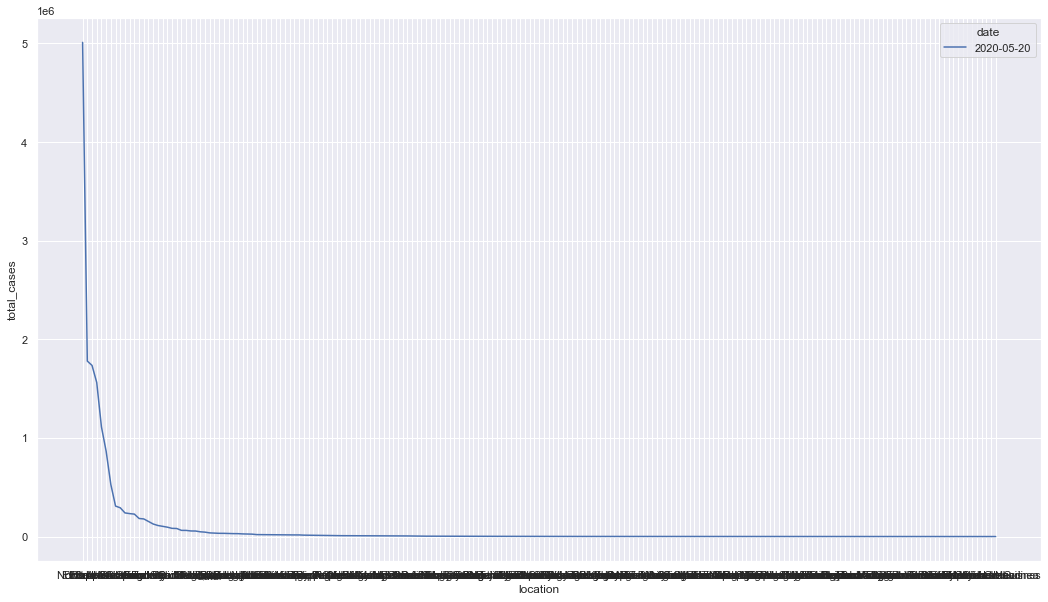

In [51]:
#plotting the graph for max caes in country
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(x="location",y="total_cases",data=max_cases_country,hue="date")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#converting string date todate-time
import datetime as dt
india_case['date'] = pd.to_datetime(india_case['date'])
india_case.head()

<ipython-input-53-575a011f0106>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['date'] = pd.to_datetime(india_case['date'])


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42181,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42182,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42183,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42184,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42185,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [54]:
#converting date-time to ordinal
india_case['date']=india_case['date'].map(dt.datetime.toordinal)
india_case.head()

<ipython-input-54-9eb3bcdebcda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['date']=india_case['date'].map(dt.datetime.toordinal)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42181,IND,Asia,India,737454,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42182,IND,Asia,India,737455,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42183,IND,Asia,India,737456,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42184,IND,Asia,India,737457,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42185,IND,Asia,India,737458,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [58]:
# getting dependent variable to independent variable
x=india_case['date']
y=india_case['total_cases']

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [65]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42706,IND,Asia,India,737979,30752950.0,43393.0,42099.857,405939.0,911.0,803.857,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42707,IND,Asia,India,737980,30795716.0,42766.0,41907.714,407145.0,1206.0,870.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42708,IND,Asia,India,737981,30837222.0,41506.0,41684.143,408040.0,895.0,862.143,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42709,IND,Asia,India,737982,30874376.0,37154.0,41306.714,408764.0,724.0,862.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42710,IND,Asia,India,737983,30874376.0,0.0,36349.143,408764.0,0.0,783.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [66]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(x_test,y_pred)

137183997964271.97

In [69]:
lr.predict(np.array([[737570]]))

array([[415284.0786438]])